<a href="https://colab.research.google.com/github/SABA29SULTANA/SABA29SULTANA/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics



*   **Project Type** - Exploratory Data Analysis (EDA)
*   **Project Member** - Saba Sultana



##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import plotly.express as px

In [ ]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/export?format=csv"
data_df = pd.read_csv(url)

In [ ]:
# Data set first look
data_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Info about the data set
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Converting 'Dt_customer' column to 'datetime'
data_df['Dt_Customer'] = pd.to_datetime(data_df['Dt_Customer'], errors='coerce')

In [ ]:
#Checking for any missing vlaue
data_df.isnull().sum().sort_values(ascending= False)

Dt_Customer            916
Income                  24
Id                       0
MntFishProducts          0
Response                 0
NumWebVisitsMonth        0
NumStorePurchases        0
NumCatalogPurchases      0
NumWebPurchases          0
NumDealsPurchases        0
MntGoldProds             0
MntSweetProducts         0
MntMeatProducts          0
Year_Birth               0
MntFruits                0
MntWines                 0
Recency                  0
Teenhome                 0
Kidhome                  0
Marital_Status           0
Education                0
Complain                 0
dtype: int64

In [ ]:
#Handling missing values in 'Dt_Customer' by removing the rows with null values
data_df = data_df.dropna(subset=['Dt_Customer'])

In [ ]:
#Removing the null value by using drop function
data_df.dropna(subset =['Income'], inplace = True)
data_df.isnull().sum().sort_values(ascending = False)

Id                     0
Year_Birth             0
Response               0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Complain               0
dtype: int64

In [ ]:
#Descriptive statistics for age
age_stat = data_df['Year_Birth'].describe()
print(age_stat)

count    1311.000000
mean     1968.692601
std        12.096341
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


**Analysisng the distribution of Education and Marital_Status**

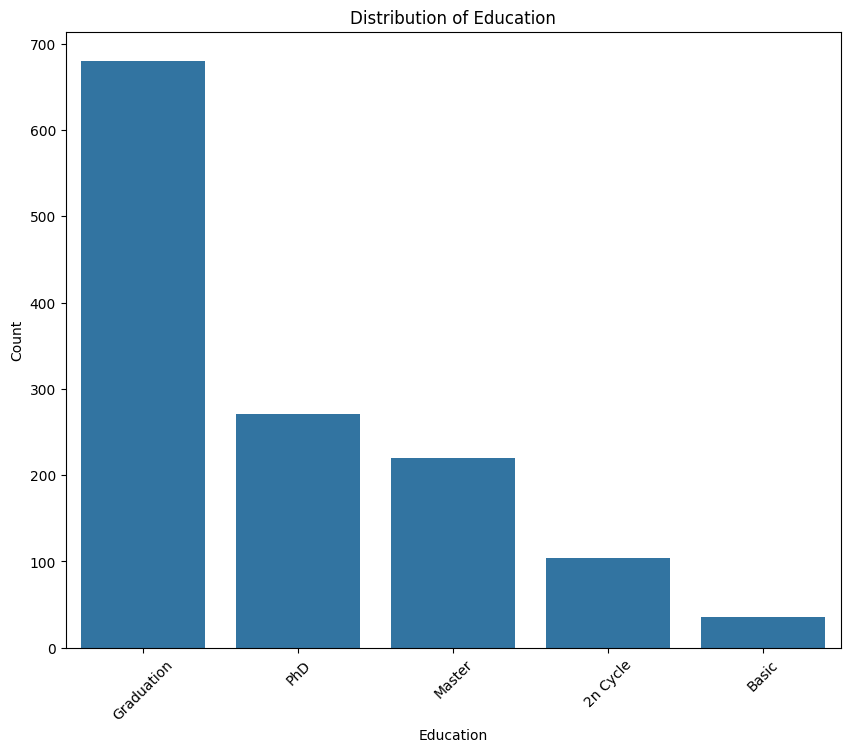

In [ ]:
#Distribution of Educational and Martial Status
plt.figure(figsize = (10,8))
plt.title('Distribution of Education')
sns.countplot(data= data_df, x ='Education', order= data_df['Education'].value_counts().index)
plt.xticks(rotation = 45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

From the above bar chart plot we can see the different categories of education.



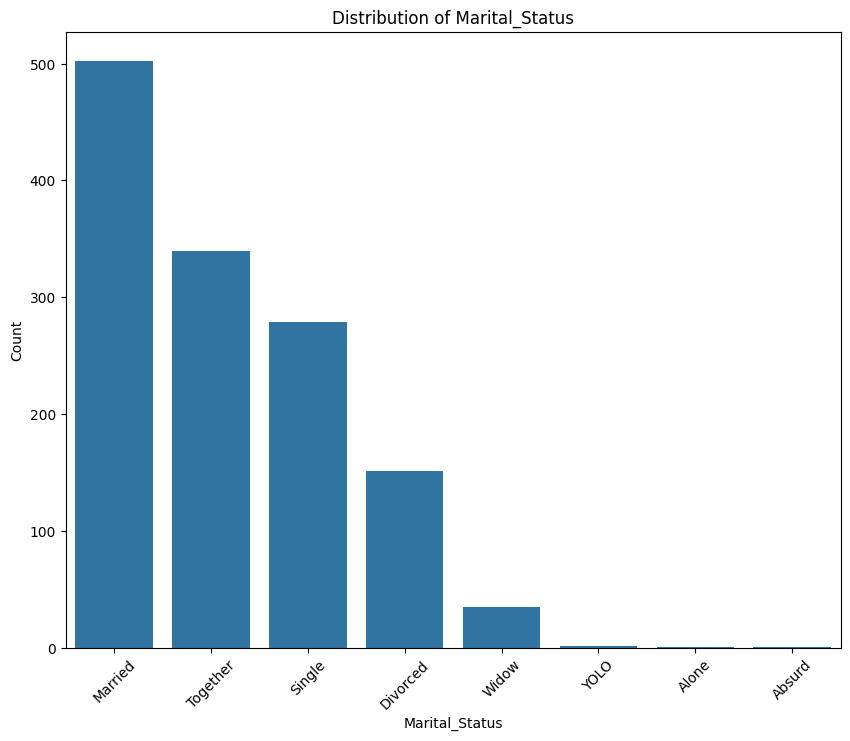

In [ ]:
#Distribution of Marital_Status
plt.figure(figsize= (10,8))
plt.title('Distribution of Marital_Status')
sns.countplot(data= data_df,x= 'Marital_Status', order = data_df['Marital_Status'].value_counts().index)
plt.xlabel('Marital_Status')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

Here we can see the different marital status for the different categories from the above bar chart ploting.



In [ ]:
Numerical_stat = data_df.describe()
print(Numerical_stat)

                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   1311.000000  1311.000000    1311.000000  1311.000000  1311.000000   
mean    5447.928299  1968.692601   51429.747521     0.435545     0.501907   
std     3233.235292    12.096341   20960.186407     0.530234     0.542644   
min        1.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2735.000000  1959.000000   35541.000000     0.000000     0.000000   
50%     5231.000000  1970.000000   50447.000000     0.000000     0.000000   
75%     8205.500000  1977.000000   68211.000000     1.000000     1.000000   
max    11188.000000  1996.000000  157146.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1311.000000  1311.000000  1311.000000      1311.000000   
mean     49.302059   302.807018    25.255530       162.717010   
std      28.802571   339.168809    38.626568       219.717636   
min       0.000000     0.000000     0.000000  

***Deliverables***:

**Cleaned and Preprocessed Dataset**:

Provide a detailed report on the steps taken to handle missing values,
including imputation methods used if applicable. Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

**Summary of Basic Statistics**:

Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable. Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
#Calculate the measures of central tendency
mean_fish = data_df['MntFishProducts'].mean()
print(mean_fish)

median_fish = data_df['MntFishProducts'].median()
print(median_fish)

mode_fish = data_df['MntFishProducts'].mode()
print(mode_fish)


36.47139588100686
11.0
0    0
Name: MntFishProducts, dtype: int64


In [ ]:
#Calculate the measures of dispersion
variance_fish = data_df['MntFishProducts'].var()
print(variance_fish)

std_deviation_fish = data_df['MntFishProducts'].std()
print(std_deviation_fish)

2966.953188813388
54.46974562831543


In [ ]:
#Selecting the key numerical variables
numerical_variables = data_df.select_dtypes(include=np.number).columns.tolist()
column_to_exclude= ['Id','Year_Birth','Kidhome','Teenhome','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']
numerical_variables = [ var for var in numerical_variables if var not in column_to_exclude]
print(numerical_variables)

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Response']


In [ ]:
#Measure of central tendency
for variable in numerical_variables:
  mean = data_df[variable].mean()
  median = data_df[variable].median()
  mode_result = stats.mode(data_df[variable])
  mode = ", ".join(map(str, [mode_result.mode]))

#Measure of dispersion
  variance = data_df[variable].var()
  std_deviation = data_df[variable].std()

#Identify and handle outliers (using IQR)
  q1 = data_df[variable].quantile(0.25)
  q3 = data_df[variable].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
#Identify outliers
  outliers = data_df[(data_df[variable] > upper_bound)][variable]

#Print Statistics
  print(f"Variable:{variable}")
  print(f"Mean:{mean:.2f}")
  print(f"Median:{median:.2f}")
  print(f"Mode(s):{mode}")
  print(f"Variance:{variance:.2f}")
  print(f"Std_deviation:{std_deviation:.2f}")
  print(f"Number of Outliers:{len(outliers)}")
  print(f"Outliers:{list(outliers)}\n")

Variable:Income
Mean:51429.75
Median:50447.00
Mode(s):7500.0
Variance:439329414.20
Std_deviation:20960.19
Number of Outliers:2
Outliers:[157146.0, 156924.0]

Variable:Recency
Mean:49.30
Median:50.00
Mode(s):65
Variance:829.59
Std_deviation:28.80
Number of Outliers:0
Outliers:[]

Variable:MntWines
Mean:302.81
Median:171.00
Mode(s):2
Variance:115035.48
Std_deviation:339.17
Number of Outliers:29
Outliers:[1285, 1296, 1239, 1205, 1308, 1230, 1218, 1218, 1253, 1394, 1276, 1288, 1311, 1486, 1492, 1492, 1259, 1241, 1218, 1224, 1245, 1459, 1379, 1285, 1298, 1315, 1396, 1324, 1252]

Variable:MntFruits
Mean:25.26
Median:7.00
Mode(s):0
Variance:1492.01
Std_deviation:38.63
Number of Outliers:139
Outliers:[104, 130, 80, 174, 107, 105, 105, 81, 81, 96, 86, 83, 80, 83, 153, 83, 88, 88, 133, 99, 129, 129, 93, 107, 86, 79, 168, 98, 172, 140, 91, 80, 151, 197, 185, 178, 189, 98, 98, 99, 93, 108, 91, 129, 120, 120, 107, 84, 183, 129, 129, 160, 114, 111, 161, 144, 112, 112, 181, 133, 89, 102, 142, 155, 13

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
#Chossing a random variable(e.g,MntWines for the normal distribution)
variable_name = 'MntWines'
variable_data = df[variable_name]

#Check for the normality using the Shapiro-Wilk test
shapiro_test = stats.shapiro(variable_data)

#Calculate probabilities and expected value assuming a normal distribution
if shapiro_test.pvalue > 0.05:  # If p-value is greater than 0.05, data is approximately normally distributed
   mean = np.mean(variable_data)
   std_dev = np.std(variable_data)

   #Probability of a value falling within a certain range (e.g., 100 to 500)
   lower_bound = 100
   upper_bound = 500
   probability_within_range = stats.norm.cdf(upper_bound,loc = mean,scale = std_dev) - stats.norm.cdf(lower_bound,loc = mean,scale = std_dev)


   #Expected value of the variable
   expected_value = mean
   print(f"Probabilty of the variable being between {lower_bound} and {upper_bound} : {probability_within_range}")
   print(f"Expected value of the variable: {expected_value}")
else:
   print(f"The '{variable_name}' does not follow a normal distribution")

print(f"Is approximately normally distributed:{shapiro_test.pvalue>0.05}")

The 'MntWines' does not follow a normal distribution
Is approximately normally distributed:False


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

Text(0.5, 1.0, 'Distribution per education category')

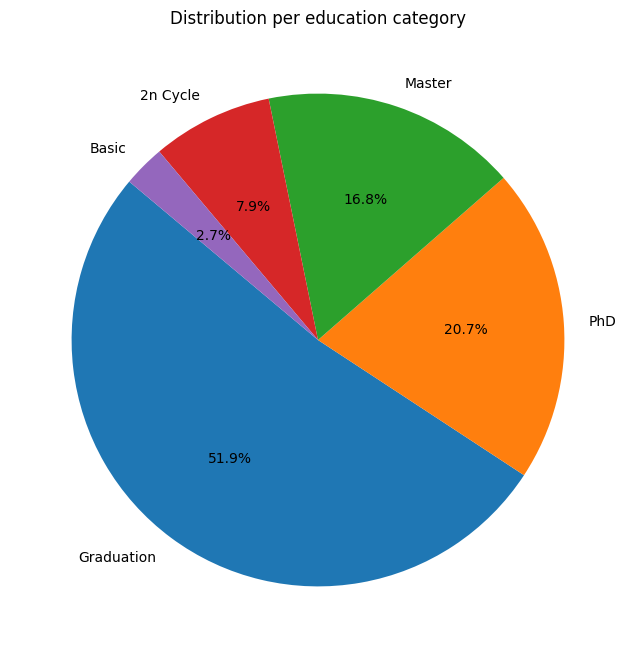

In [ ]:
#The number of customer in each education category
customer_counts = data_df['Education'].value_counts()

#Creating a Pie chart
plt.figure(figsize=(10,8))
plt.pie(customer_counts, labels=customer_counts.index,autopct='%1.1f%%',startangle = 140)
plt.title('Distribution per education category')


This Pie Chart shows the distribution of education categories with the graduation on being top followed by phd then master,2n cycle and basic

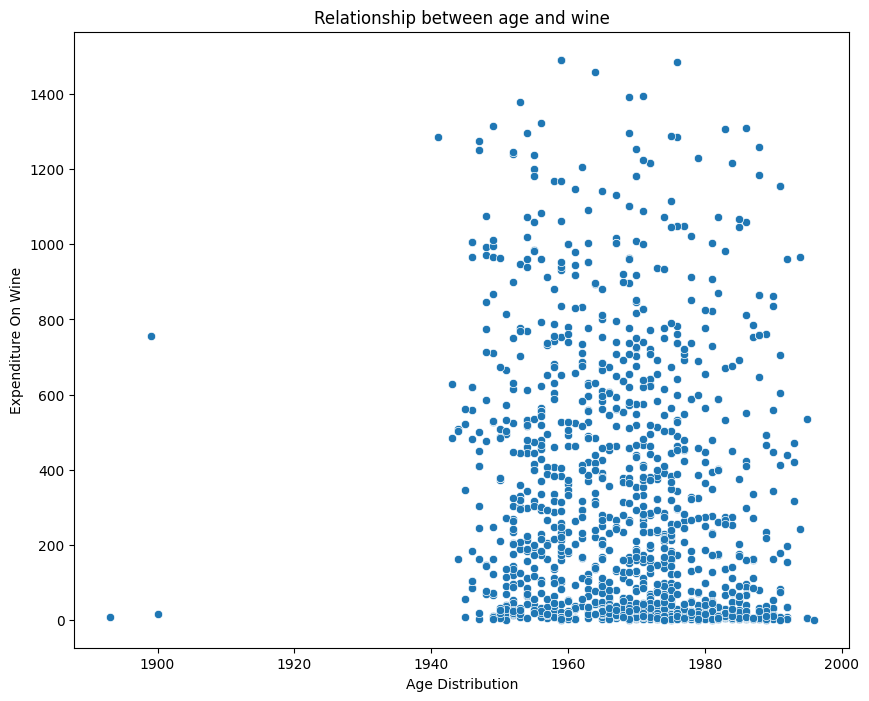

In [ ]:
#Creating a scatter plot
plt.figure(figsize = (10,8))
sns.scatterplot(x ='Year_Birth', y ='MntWines', data = data_df)
plt.xlabel('Age Distribution')
plt.ylabel('Expenditure On Wine')
plt.title('Relationship between age and wine')
plt.show()

From the above scatter plot we can conclude that the customer in between the age from 1945 to 1995 have the most number of expenditure on wine till 200.


<Figure size 1400x800 with 0 Axes>

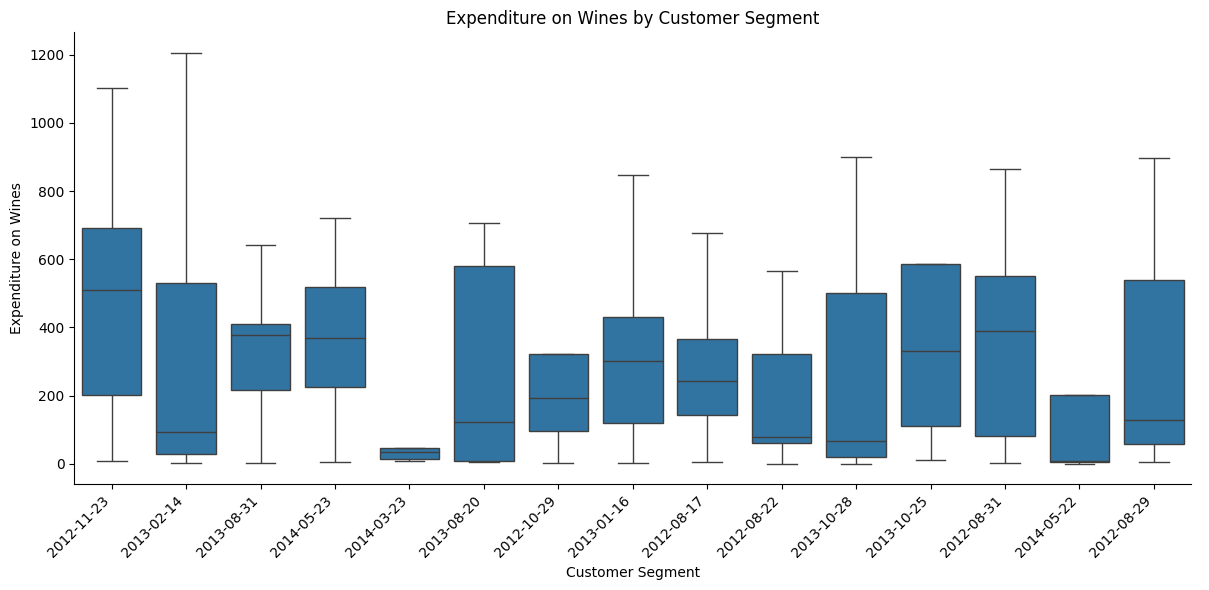

In [ ]:
#Selecting top 15 values of 'Dt_Customer' and filtering the data
top_15_Dt_Customer = data_df['Dt_Customer'].value_counts().nlargest(15).index
filtered_data = data_df[data_df['Dt_Customer'].isin(top_15_Dt_Customer)]

# Plotting Expenditure on Wines by customer segments
plt.figure(figsize=(14, 8))
sns.catplot(x='Dt_Customer', y='MntWines', data=filtered_data, kind='box', height=6, aspect=2, showfliers=False)
plt.xlabel('Customer Segment')
plt.ylabel('Expenditure on Wines')
plt.title('Expenditure on Wines by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here in this chart we can see the top 15 customer segment with the rate of expenditure on wine



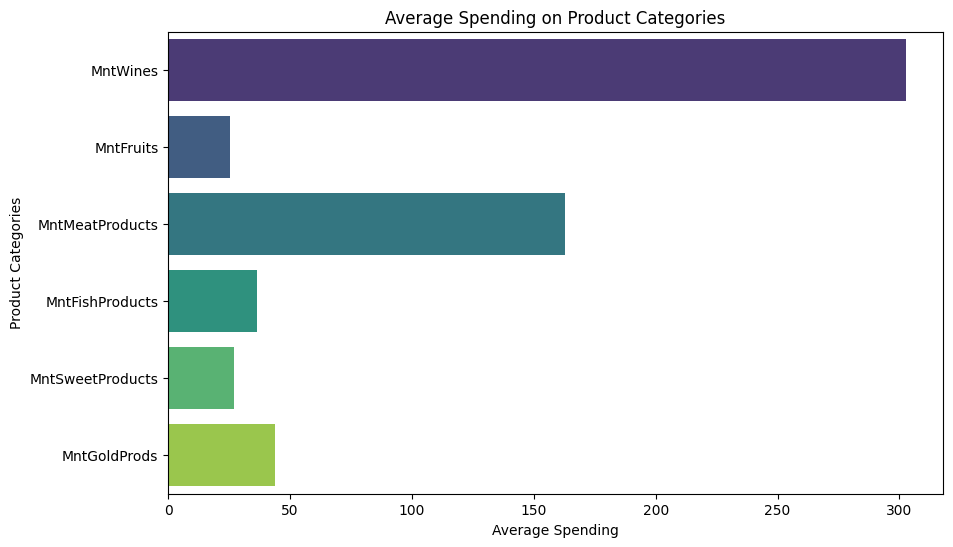

In [ ]:
#Group data by product categories and calculate mean spending
category_mean =data_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

#Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_mean.values, y=category_mean.index,hue=category_mean.index, dodge=False, palette='viridis')
plt.xlabel('Average Spending')
plt.ylabel('Product Categories')
plt.title('Average Spending on Product Categories')
plt.show()

From the above bar plot chart we can see the average spending on each product by the customers



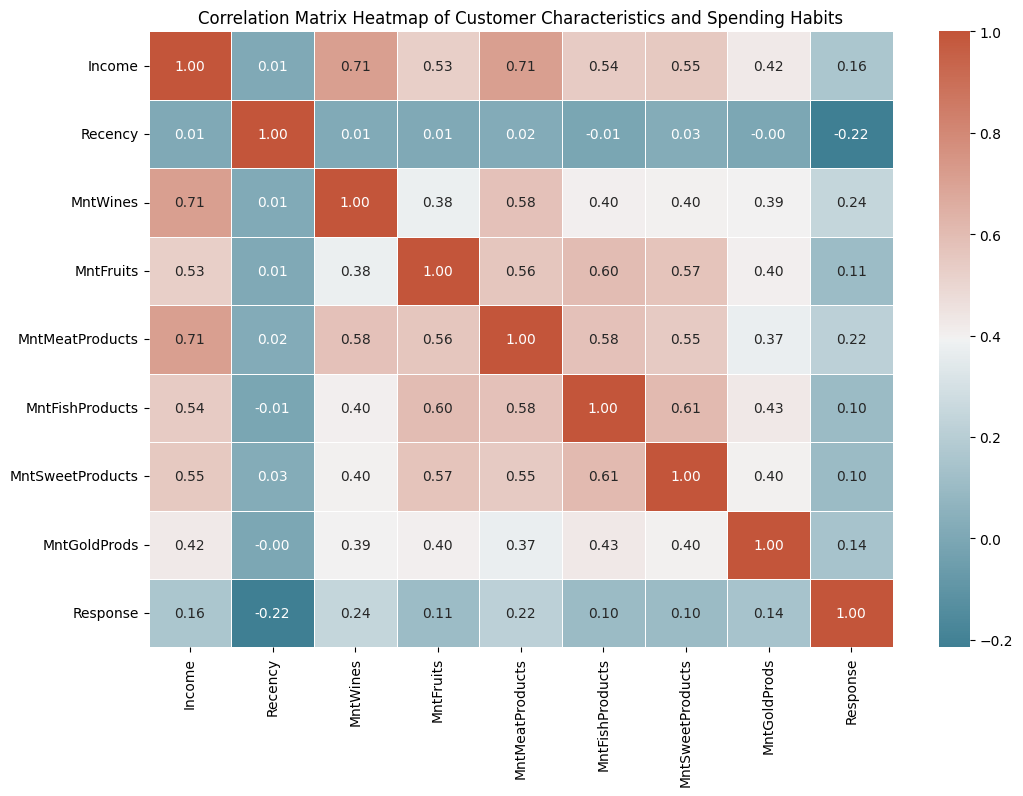

In [ ]:
# Compute correlation matrix
correlation_matrix = data_df[numerical_variables].corr()

# Create a diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with a different style
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Customer Characteristics and Spending Habits')
plt.show()

The heatmap shows the co-relation between customer characteristics and spending habits on product category.



**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

Given the high average spending at the wine catgory, the company should consider focusing more resources on this segment. This could involve expanding the wine selection to include premium and rare varieties, organizing wine tasting events, or offering wine pairing services to attract more high-spending customers.

While the spending at the meat category is not as high as the wine shop, it still represents a significant portion of revenue. The company should ensure that the meat offerings are of high quality and diverse enough to cater to various preferences. Introducing specialty cuts, marinated options, or value-added products could attract more customers and increase spending.

Since the spending at the fruit, fish, gold, and sweet category is low, the company should evaluate the product offerings, pricing strategies, and overall customer experience in these establishments. It may be necessary to adjust the product mix, improve visibility and marketing efforts, or explore collaborations with local vendors to enhance the appeal of these shops and increase spending.

By focusing on these recommendations, the company can capitalize on the insights derived from customer spending behavior to optimize its offerings, attract more customers, and drive overall revenue growth in the area.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍